In [1]:
import os
# Prevenção de vazamento de memória do MKL no Windows
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd                       # Importa a biblioteca Pandas para manipulação e análise de dados (por exemplo, ler arquivos CSV).
from sklearn.cluster import KMeans        # Importa o algoritmo K-Means para realizar o agrupamento (clustering) dos dados.
from sklearn.preprocessing import StandardScaler # Importa o StandardScaler para padronizar os dados, o que é crucial para algoritmos baseados em distância como o K-Means.
import matplotlib.pyplot as plt           # Importa a biblioteca Matplotlib (Pyplot) para criar gráficos e visualizar os resultados do agrupamento.

In [3]:
# --- 1. CARREGAR E LIMPAR OS DADOS ---

# Carregar os dados
df = pd.read_csv('dados_soja.csv') # Lê o arquivo 'dados_soja.csv' (que contém as informações sobre a soja) e armazena os dados em um DataFrame chamado 'df' para fácil manipulação pelo Pandas.

# Limpeza e conversão da coluna 'valor'
df['valor'] = df['valor'].replace('-', '0')              # Substitui quaisquer traços ('-') encontrados na coluna 'valor' pelo caractere '0', tratando-os como dados ausentes ou inválidos que devem ser zero.
df['valor'] = df['valor'].astype(str).str.replace('.', '', regex=False) # Converte a coluna 'valor' para string e, em seguida, remove todos os pontos ('.') presentes. Isso é comumente necessário para valores numéricos formatados em texto (ex: separador de milhar).
df['valor'] = df['valor'].astype(float)                  # Converte o conteúdo da coluna 'valor' (agora limpo de traços e pontos) para o tipo numérico de ponto flutuante (float), preparando-o para cálculos matemáticos ou modelos de Machine Learning.

In [4]:
# --- 2. PREPARAR DADOS PARA O MODELO ---

# Selecionar variáveis relevantes e formatar para o Scikit-learn
# NOTA: Assumimos que 'id' é um identificador como 'Estado'
X = df[['valor']].values # Converte a coluna 'valor' (que agora está limpa e no formato float) para um array NumPy bidimensional 'X'. Este formato é o que o scikit-learn espera como a matriz de características de entrada para o algoritmo K-Means.

# *Opcional e Recomendado*: Padronização dos dados (se houvesse mais de uma variável)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# --- 3. EXECUTAR O AGRUPAMENTO K-MEANS ---

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto') # Instancia o modelo K-Means, definindo que ele deve buscar 4 grupos (clusters) nos dados e usa 'random_state=42' para garantir que os resultados sejam os mesmos em execuções futuras (reprodutibilidade).
df['Cluster'] = kmeans.fit_predict(X)         # Treina o modelo K-Means usando os dados de entrada 'X' e, em seguida, atribui imediatamente um rótulo de cluster (de 0 a 3) a cada linha. O resultado é armazenado em uma nova coluna chamada 'Cluster' no DataFrame original 'df'.

In [6]:
# --- 4. VISUALIZAR E ANALISAR RESULTADOS ---

# Imprimir as colunas relevantes
print("--- Resultados do Agrupamento K-Means ---")
print(df[['id', 'valor', 'Cluster']]) # Exibe na tela as colunas 'id', 'valor' e a nova coluna 'Cluster' do DataFrame 'df'.

--- Resultados do Agrupamento K-Means ---
    id       valor  Cluster
0    0   3727182.0        2
1    1    117790.0        0
2    2    101583.0        0
3    3    839864.0        0
4    4   7307684.0        2
5    5     24721.0        0
6    6   7423563.0        2
7    7   8338428.0        2
8    8   7322801.0        2
9    9     25110.0        0
10  10       600.0        0
11  11         0.0        0
12  12         0.0        0
13  13     35327.0        0
14  14         0.0        0
15  15  14432772.0        4
16  16  13653404.0        4
17  17      2951.0        0
18  18      4179.0        0
19  19   7161317.0        2
20  20  34549450.0        1
21  21   5325337.0        2
22  22  36103542.0        1
23  23  19232215.0        4
24  24  63847218.0        3
25  25  30079916.0        1
26  26    576554.0        0


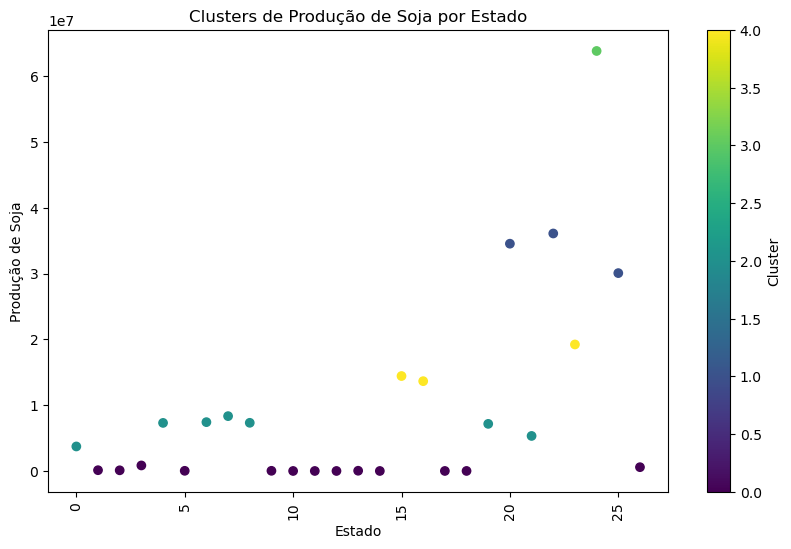

In [7]:
# Criar o gráfico de dispersão (Scatter Plot)
plt.figure(figsize=(10,6))                       # Cria uma nova figura (o "canvas" do gráfico) e define seu tamanho.
plt.scatter(df['id'], df['valor'], c=df['Cluster'], cmap='viridis') # Cria um gráfico de dispersão, colorindo os pontos pelo cluster.
plt.xticks(rotation=90)                          # Rotaciona os rótulos do eixo X (os IDs/Estados) em 90 graus para que sejam legíveis.
plt.xlabel('Estado')                             # Define o rótulo do eixo X como 'Estado'.
plt.ylabel('Produção de Soja')                   # Define o rótulo do eixo Y como 'Produção de Soja'.
plt.title('Clusters de Produção de Soja por Estado') # Define o título principal do gráfico.
plt.colorbar(label='Cluster')                    # Adiciona uma barra lateral de cores (legenda) ao gráfico.
plt.show()                                       # Exibe o gráfico finalizado na tela.